### Import Libraries


In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## PART A

Part A.1 Import and analyse the data set

In [2]:
top_words = 10000

In [3]:
# Loading the dataset (top 10000 words, zero the rest)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Merging and create features, labels and DataFrame
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
# DataFrame
data_raw = pd.DataFrame({'Review': X, 'Sentiment': y})
data_raw.sample(5)

,Review,Sentiment
20658,"[1, 387, 72, 380, 34, 660, 15, 325, 9395, 9, 2...",1
5465,"[1, 38, 12, 47, 216, 8, 14, 702, 3269, 1880, 1...",0
27496,"[1, 2, 2, 91, 804, 20, 47, 371, 2, 4, 2181, 7,...",1
30112,"[1, 146, 2414, 15, 32, 4, 1800, 12, 2896, 26, ...",0
25243,"[1, 14, 9, 427, 164, 40, 4, 2, 5, 4, 2, 7, 4, ...",0


In [5]:
# Shape of the data
print("Total training data shape: ")
print("Features: ", X.shape)
print("Labels: ", y.shape)

Total training data shape: 
Features:  (50000,)
Labels:  (50000,)


In [6]:
# number of labels
print("Labels: ", np.unique(y))

Labels:  [0 1]


In [7]:
# label count
data_raw['Sentiment'].value_counts()

1    25000
0    25000
Name: Sentiment, dtype: int64

In [8]:
# Word count
print("Word count: ", len(np.unique(np.hstack(X))))

Word count:  9998


Average Review length: 234.76
Standard Deviation: 172.91


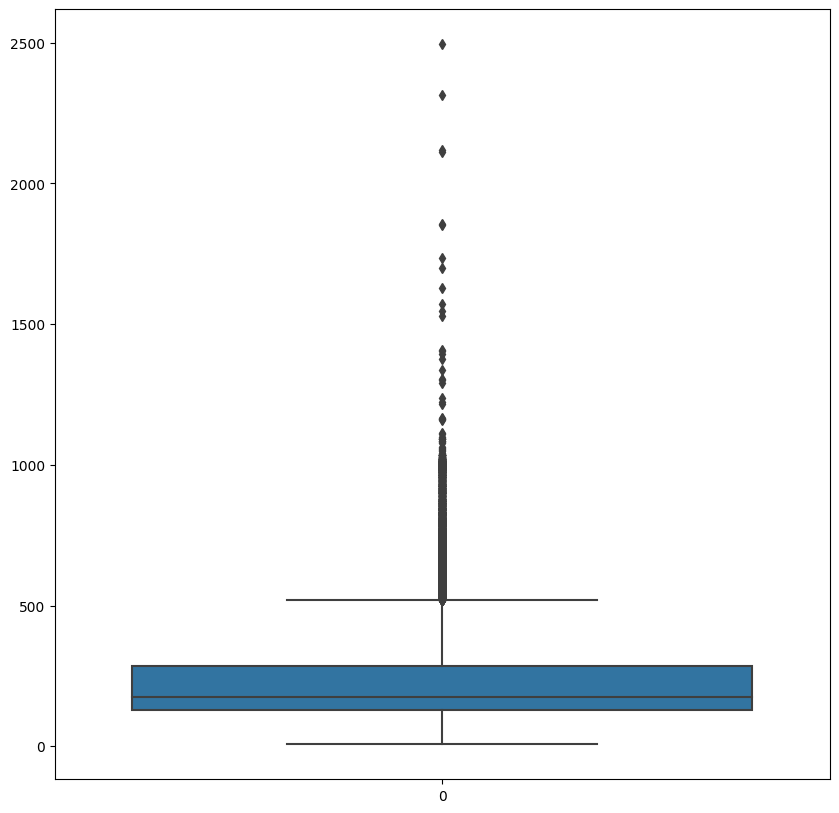

In [9]:
# review length
length = [len(x) for x in X]
print("Average Review length: %.2f" % np.mean(length))
print("Standard Deviation: %.2f" % np.std(length))
plt.figure(figsize= (10,10))
sns.boxplot(length)
plt.show()

Part A 2. Perform relevant sequence adding on the data

In [10]:
# padding dataset to a maximum review length
maximum_len = 500
embedding_size = 32
X_train = pad_sequences(X_train, maxlen=maximum_len)
X_test = pad_sequences(X_test, maxlen=maximum_len)

Part A.3.Print shape of features and labels, Print value of any one feature and it's label

In [11]:
print("features shape: ", X.shape)
print("labels shape: ", y.shape)

features shape:  (50000,)
labels shape:  (50000,)


In [12]:
print("Label:", y[0])
print("Feature: ")
print(X[0])

Label: 1
Feature: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Part A.4 Decode the feature value to get original sentence

In [13]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]] )
print(decoded)

1641221/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Part A.5 Design, train, tune and test a sequential model

In [14]:
print("Training Data shape: ", X_train.shape)
print("Testing Data shape: ", X_test.shape)

Training Data shape:  (25000, 500)
Testing Data shape:  (25000, 500)


In [15]:
clear_session()
model = Sequential()
model.add(Embedding(top_words, embedding_size, input_length=maximum_len))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(1, activation='sigmoid'))
adam_opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer= adam_opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 dense (Dense)               (None, 500, 250)          8250      
                                                                 
 dropout (Dropout)           (None, 500, 250)          0         
                                                                 
 flatten (Flatten)           (None, 125000)            0         
                                                                 
 dense_1 (Dense)             (None, 150)               18750150  
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [16]:
batch_size = 128
epochs = 2
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = epochs, batch_size = batch_size, verbose=2)

Epoch 1/2
196/196 - 152s - loss: 0.5218 - accuracy: 0.7068 - val_loss: 0.2927 - val_accuracy: 0.8741 - 152s/epoch - 777ms/step
Epoch 2/2
196/196 - 144s - loss: 0.2300 - accuracy: 0.9120 - val_loss: 0.2760 - val_accuracy: 0.8850 - 144s/epoch - 733ms/step


In [17]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 95.972%
Train Loss: 0.139
Test Accuracy: 88.504%
Test Loss: 0.276


In [18]:
predictions = model.predict(X_test)
predictions[0]

782/782 [==============================] - 30s 38ms/step


array([0.13168289], dtype=float32)

In [19]:
# Inversing probability into test labels
rounded = [round(x[0]) for x in predictions]
predictions = rounded

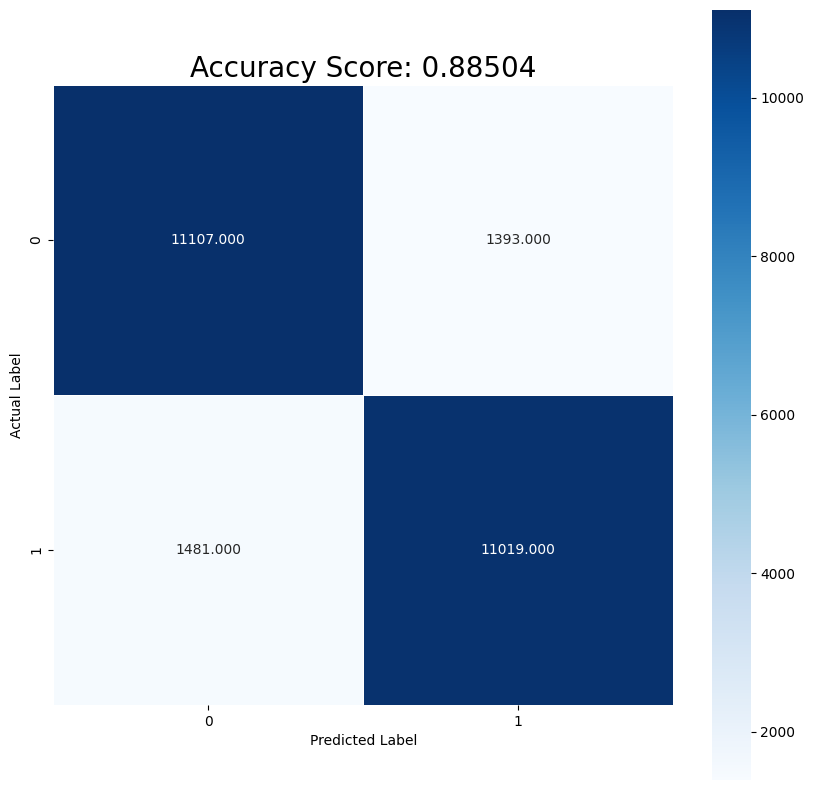

In [20]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="Blues")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title, size = 20)
plt.show()

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     12500
           1       0.89      0.88      0.88     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



Part A.6 Use the designed model to print the prediction on any one sample

In [22]:
# Creating word dictionary
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0
word_dict['>'] = 1
word_dict['?'] = 2
reverse_word_dict = { value:key for key, value in word_dict.items() }

In [23]:
def predict_on_sample(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = pad_sequences([input], maxlen=maximum_len)

    # Predicting on sample
    result = model.predict(np.array([padded_input][0]))[0][0]

    # Checking the result
    predicted_sentiment = ""
    if round(result) == 1:
      predicted_sentiment = "Predicted Sentiment is Positive"
    else:
      predicted_sentiment = "Predicted Sentiment is Negative"

    return result, predicted_sentiment

In [24]:
# Positive movie review: prediction
result, predicted_sentiment = predict_on_sample("This movie, as far as J-Statham films goes, was phenomenal. If you are going into this expecting an action film, you are definitely getting more than you bargained for.")
print("Predicted Probability : ", result)
print(predicted_sentiment)

1/1 [==============================] - 0s 25ms/step
Predicted Probability :  0.79607236
Predicted Sentiment is Positive


In [25]:
# Negative movie review: prediction
result, predicted_sentiment = predict_on_sample("I was completely wrong.  The acting and dialogue were horrible.  Couldn’t decide if the screenwriter hurt the acting or the actors butchered the script.  Both were equally awful.")
print("Predicted Probability : ", result)
print(predicted_sentiment)

1/1 [==============================] - 0s 22ms/step
Predicted Probability :  0.0150478585
Predicted Sentiment is Negative


## PART B

Part B 1. Read and explore the data

In [26]:
data = 'https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json'
data_r = pd.read_json(data, lines=True)
data_r.sample(5)

,is_sarcastic,headline,article_link
17844,1,psychologists advise practicing words 'preside...,https://www.theonion.com/psychologists-advise-...
1937,0,lesson for urban cities: how chicagoans stand ...,https://www.huffingtonpost.com/entry/lesson-fo...
25491,1,alarming study finds 60% of americans don't kn...,https://www.theonion.com/alarming-study-finds-...
3543,1,wisconsin has crush on minnesota,https://www.theonion.com/wisconsin-has-crush-o...
19288,1,home depot employee can tell this customer's f...,https://local.theonion.com/home-depot-employee...


In [27]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [28]:
# missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data_r)

Your selected dataframe has 3 columns and 28619 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [29]:
import regex as re

# Seperating the source
data_r['source'] = data_r['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
data_r.head()

,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion


In [30]:
print("Labels details:")
print(data_r['is_sarcastic'].value_counts())

Labels details:
0    14985
1    13634
Name: is_sarcastic, dtype: int64


In [31]:
import string
print("Source details:")
print(data_r['source'].value_counts())

Source details:
huffingtonpost    14985
theonion          13634
Name: source, dtype: int64


Part B 2. Retain relevant columns

In [32]:
#Creating new DataFrame
data = pd.DataFrame({'Features': data_r['headline'], 'Labels': data_r['is_sarcastic']})
data.sample(5)

,Features,Labels
23837,race in america: changing reality by facing it,0
15934,intricacies of meal plan discussed,1
11585,"onion social ceo rebukes 480,000 crimes at int...",1
22449,"in a hate-filled election, this moment shows e...",0
15183,new 'call of duty' career mode lets player joi...,1


Unsarcastic WordCloud


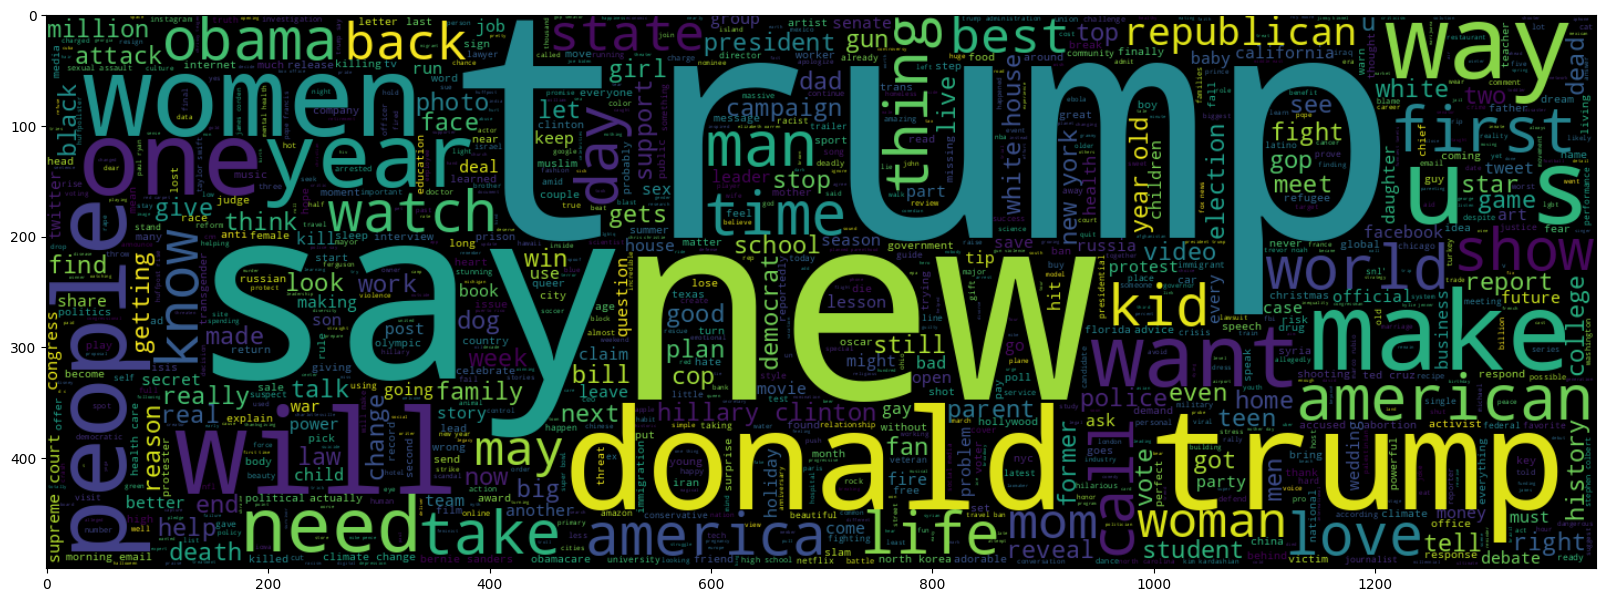

In [33]:
from wordcloud import WordCloud

print("Unsarcastic WordCloud")
plt.figure(figsize=(20,20))
wordcloud = WordCloud(max_words = 1000, width = 1400, height=500).generate(" ".join(data[data.Labels==0].Features))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

Sarcastic WordCloud


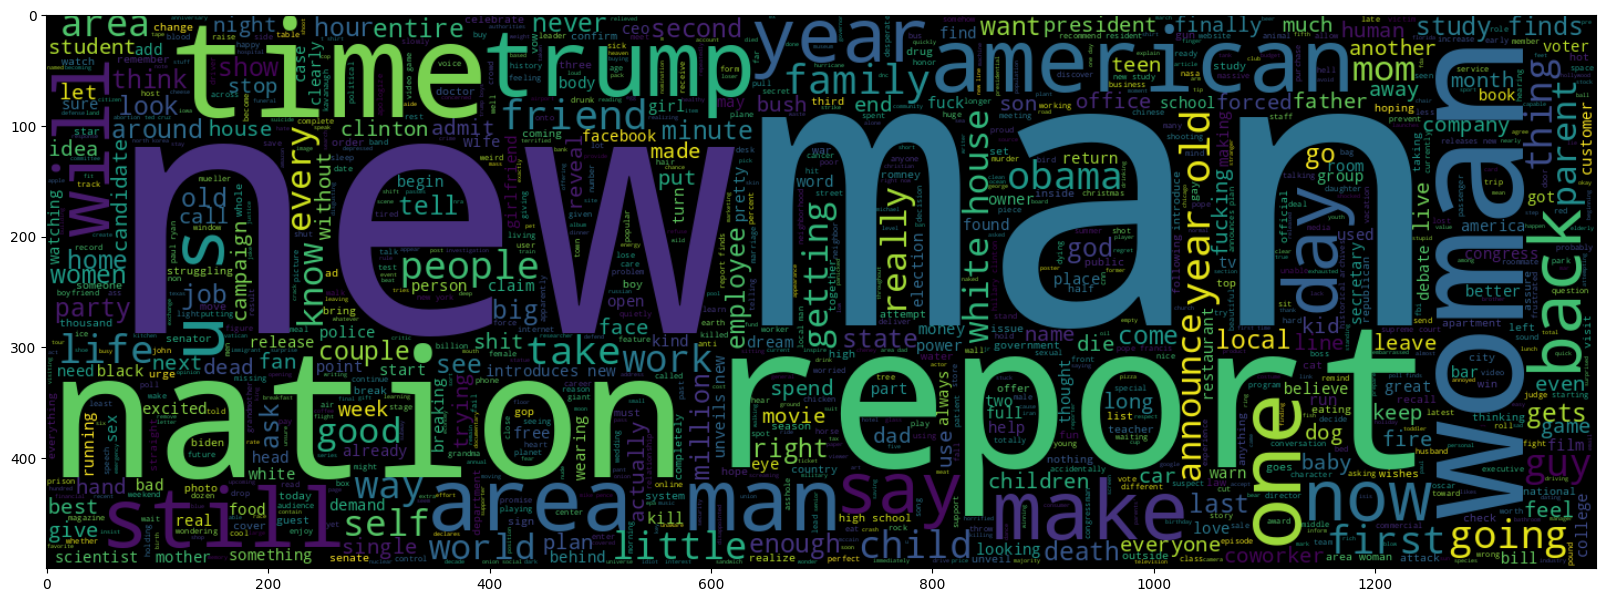

In [34]:
# Sarcastic WordCloud
print("Sarcastic WordCloud")
plt.figure(figsize=(20,20))
wordcloud = WordCloud(max_words = 1000, width = 1400, height=500).generate(" ".join(data[data.Labels==1].Features))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

Part B 3. Get length of each sentence

In [35]:
# Capturing each sentence lengths
data_r['sentences_lengths'] = data_r['headline'].apply(lambda x: len(x))
data_r.head(5)

,is_sarcastic,headline,article_link,source,sentences_lengths
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion,61
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost,79
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost,49
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion,52
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion,61


In [36]:
data_r['sentences_lengths'].describe()

count    28619.000000
mean        62.308571
std         20.726483
min          7.000000
25%         49.000000
50%         62.000000
75%         75.000000
max        926.000000
Name: sentences_lengths, dtype: float64

Part B 4 Define parameters

In [37]:
vocab_size = 30000
oov_token = '<00V>'
max_length = 100
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 100
batch_size = 256
num_epochs = 30

Part B 5. Get indices for words

In [38]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data['Features'])
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(data['Features'])

print("Indices for words:", word_index)
print("Tokenized samples:")
print(X[0])

Indices for words: {'<00V>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'at': 15, 'from': 16, 'about': 17, 'by': 18, 'after': 19, 'you': 20, 'this': 21, 'out': 22, 'up': 23, 'be': 24, 'as': 25, 'that': 26, 'it': 27, 'how': 28, 'not': 29, 'he': 30, 'his': 31, 'are': 32, 'your': 33, 'just': 34, 'what': 35, 'all': 36, 'who': 37, 'has': 38, 'will': 39, 'report': 40, 'into': 41, 'more': 42, 'one': 43, 'have': 44, 'year': 45, 'over': 46, 'why': 47, 'day': 48, 'u': 49, 'area': 50, 'woman': 51, 'can': 52, 's': 53, 'says': 54, 'donald': 55, 'time': 56, 'first': 57, 'like': 58, 'no': 59, 'her': 60, 'get': 61, 'off': 62, 'old': 63, "trump's": 64, 'life': 65, 'now': 66, 'people': 67, "'": 68, 'an': 69, 'house': 70, 'still': 71, 'obama': 72, 'white': 73, 'back': 74, 'make': 75, 'was': 76, 'than': 77, 'women': 78, 'if': 79, 'down': 80, 'when': 81, 'i': 82, 'my': 83, '5': 84, 'clinton': 85, 'could': 86, 'they':

In [39]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print("Padded sample: ")
print(X[0])

Padded sample: 
[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


Part B 6. Create features and labels

In [40]:
print("No. of Features: ", len(X))
print(X[0])

y = np.asarray(data['Labels'])

print("Number of Labels: ", len(y))
print(y[0])

No. of Features:  28619
[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Number of Labels:  28619
1


Part B 7. Get vocabulary size

In [41]:
num_words = len(tokenizer.word_index) + 1
print(" Total number of words in tokenizer:", num_words)

 Total number of words in tokenizer: 30886


Part B 8. Create a weight matrix using GloVe embeddings

In [42]:
import os
os.chdir('/content/drive/My Drive')
project_path =  "NLP_Project/glove.6B.zip"

In [43]:
glove_file = project_path

In [44]:
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [45]:
embeddings = {}
for g in open('glove.6B.100d.txt'):
  word = g.split(" ")[0]
  embd = g.split(" ")[1:]
  embd = np.asarray(embd, dtype=np.float32)
  embeddings[word] = embd

print("Length of embeddings: ", len(embeddings.values()))

Length of embeddings:  400000


In [46]:
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [47]:
print("Embedding matrix shape: ", embedding_matrix.shape)

Embedding matrix shape:  (30886, 100)


In [48]:
print("Embedding Matrix sample: ")
embedding_matrix[5]

Embedding Matrix sample: 


array([ 0.085703  , -0.22201   ,  0.16569   ,  0.13372999,  0.38238999,
        0.35400999,  0.01287   ,  0.22461   , -0.43816999,  0.50164002,
       -0.35874   , -0.34983   ,  0.055156  ,  0.69647998, -0.17958   ,
        0.067926  ,  0.39100999,  0.16039   , -0.26635   , -0.21138   ,
        0.53697997,  0.49379   ,  0.93660003,  0.66902   ,  0.21793   ,
       -0.46641999,  0.22383   , -0.36204001, -0.17656   ,  0.17479999,
       -0.20367   ,  0.13931   ,  0.019832  , -0.10413   , -0.20243999,
        0.55002999, -0.15459999,  0.98654997, -0.26863   , -0.29089999,
       -0.32866001, -0.34187999, -0.16943   , -0.42001   , -0.046727  ,
       -0.16327   ,  0.70823997, -0.74910998, -0.091559  , -0.96178001,
       -0.19746999,  0.10282   ,  0.55220997,  1.38160002, -0.65635997,
       -3.25020003, -0.31556001, -1.20550001,  1.77090001,  0.40259999,
       -0.79826999,  1.15970004, -0.33041999,  0.31382   ,  0.77385998,
        0.22595   ,  0.52471   , -0.034053  ,  0.32047999,  0.07

Part B 9. Define and compile a Bidirectional LSTM model

In [49]:
y = y.reshape(-1,1)

In [50]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 10, test_size = 0.3, stratify = y)

In [51]:
# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [52]:
print("Shape of Training Data: ", X_train.shape)
print("Shape of Testing Data: ", X_test.shape)

Shape of Training Data:  (20033, 100)
Shape of Testing Data:  (8586, 100)


In [53]:
tf.keras.backend.clear_session()
base_model = tf.keras.models.Sequential()
base_model.add(tf.keras.layers.Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length))
base_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
base_model.add(tf.keras.layers.GlobalAveragePooling1D())
base_model.add(tf.keras.layers.Dense(32, activation='relu'))
base_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [54]:
base_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3088600   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         84480     
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,177,241
Trainable params: 3,177,241
Non-

Part B 10. Fit the model and check the validation accuracy

In [55]:
mc = tf.keras.callbacks.ModelCheckpoint('base_model_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

In [56]:
base_history = base_model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, callbacks=[mc, es], validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 0.5697 - accuracy: 0.6957
Epoch 1: val_accuracy improved from -inf to 0.81481, saving model to base_model_best.hdf5
79/79 [==============================] - 39s 446ms/step - loss: 0.5697 - accuracy: 0.6957 - val_loss: 0.4224 - val_accuracy: 0.8148
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 0.3496 - accuracy: 0.8511
Epoch 2: val_accuracy improved from 0.81481 to 0.85010, saving model to base_model_best.hdf5
79/79 [==============================] - 36s 461ms/step - loss: 0.3496 - accuracy: 0.8511 - val_loss: 0.3502 - val_accuracy: 0.8501
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9057
Epoch 3: val_accuracy improved from 0.85010 to 0.86012, saving model to base_model_best.hdf5
79/79 [==============================] - 35s 444ms/step - loss: 0.2424 - accuracy: 0.9057 - val_loss: 0.3237 - val_accuracy: 0.8601
Epoch 4/30
79/79 [============================

In [57]:
base_model_best = tf.keras.models.load_model('base_model_best.hdf5')

In [58]:
# Prediction
base_predictions = base_model_best.predict(X_test, batch_size=1024).round().astype(int)
base_predictions[0]

9/9 [==============================] - 6s 512ms/step


array([1])

In [59]:
rounded = [np.round(x[0]) for x in base_predictions]
base_predictions = rounded

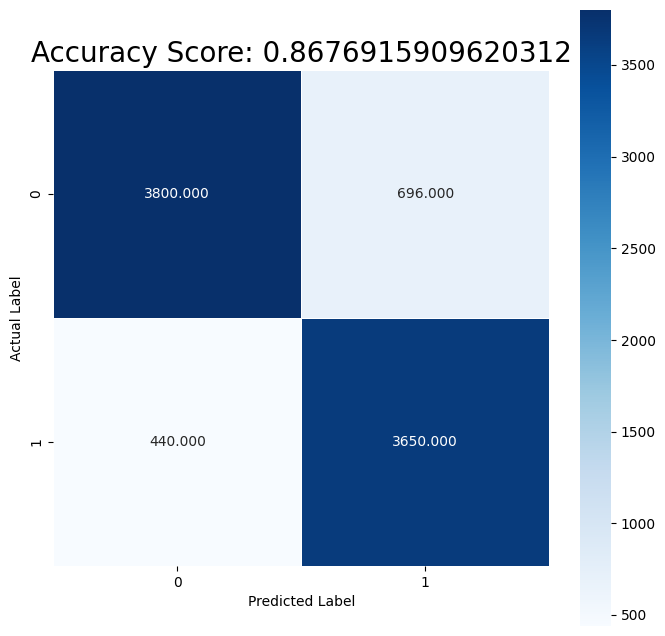

In [60]:
cm = confusion_matrix(y_test,base_predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="Blues")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,base_predictions))
plt.title(all_sample_title, size = 20)
plt.show()

In [61]:
print(classification_report(y_test, base_predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.90      0.85      0.87      4496
   Sarcastic       0.84      0.89      0.87      4090

    accuracy                           0.87      8586
   macro avg       0.87      0.87      0.87      8586
weighted avg       0.87      0.87      0.87      8586



In [62]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [63]:
adam_opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam_opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3088600   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         234496    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2

In [64]:
mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

In [65]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, callbacks=[mc, es], validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 2.0198 - accuracy: 0.6048
Epoch 1: val_accuracy improved from -inf to 0.76275, saving model to model_best.hdf5
79/79 [==============================] - 76s 908ms/step - loss: 2.0198 - accuracy: 0.6048 - val_loss: 1.3677 - val_accuracy: 0.7628
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 1.0801 - accuracy: 0.7538
Epoch 2: val_accuracy improved from 0.76275 to 0.78977, saving model to model_best.hdf5
79/79 [==============================] - 76s 970ms/step - loss: 1.0801 - accuracy: 0.7538 - val_loss: 0.8358 - val_accuracy: 0.7898
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.8315
Epoch 3: val_accuracy improved from 0.78977 to 0.83054, saving model to model_best.hdf5
79/79 [==============================] - 71s 896ms/step - loss: 0.6971 - accuracy: 0.8315 - val_loss: 0.5794 - val_accuracy: 0.8305
Epoch 4/30
79/79 [==============================] - ETA: 0s -

In [66]:
model_best = tf.keras.models.load_model('model_best.hdf5')

In [67]:
# Prediction
predictions = model_best.predict(X_test, batch_size=1024).round().astype(int)
predictions[0]

9/9 [==============================] - 9s 914ms/step


array([1])

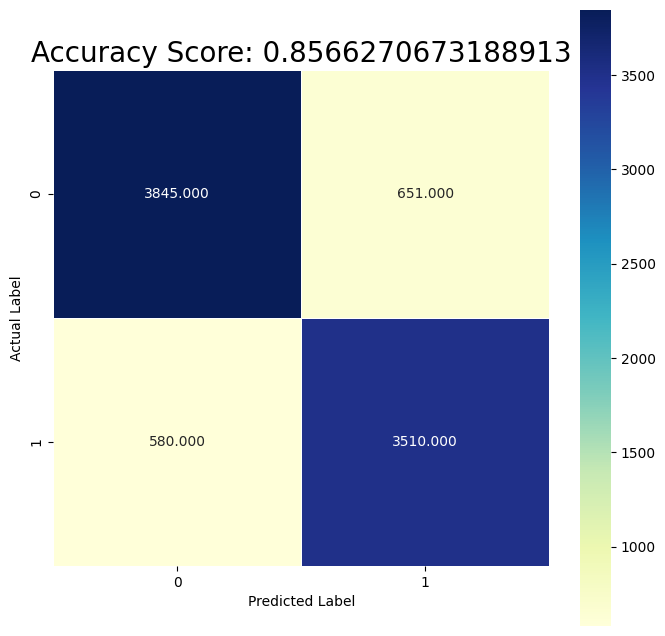

In [68]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title, size = 20)
plt.show()

In [69]:
print(classification_report(y_test, predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.87      0.86      0.86      4496
   Sarcastic       0.84      0.86      0.85      4090

    accuracy                           0.86      8586
   macro avg       0.86      0.86      0.86      8586
weighted avg       0.86      0.86      0.86      8586



## Insights


*   The first model has significant overfitting, while the second model only demonstrates slight overfitting.
*   In the second model, the difference between wrongly classified labels has decreased.
*   The f1-score of the second model experiences only a minor decrease.
*   In order to increase the f1-score or accuracy of the model without increasing overfitting, acquiring additional data is necessary.



